# 京东订单数据分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from matplotlib.ticker import FuncFormatter
plt.rcParams['font.sans-serif']=['Arial Unicode MS']

import warnings
warnings.filterwarnings('ignore')

In [2]:
order = 'course_order_d.csv'
df = pd.read_csv(order,sep='\t', encoding="utf-8", dtype=str)

In [3]:
df.head()

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,after_prefr_unit_price,user_actual_pay_amount,sale_ord_valid_flag,cancel_flag,check_account_tm,total_offer_amount,self_ord_flag,user_site_city_id,user_site_province_id,user_lv_cd
0,linfbi007,116828823929,116828823929,2020-05-25 18:09:39.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,976.0,1,0,2020-05-25 18:10:23.0,400.0,1,757,10,61
1,13601089905_p,116769479986,121562216719,2020-05-25 00:04:15.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,978.99,1,0,2020-05-25 00:05:59.0,400.0,1,0,0,62
2,jd_UbSjKwFGOfbv,116815391384,116809219025,2020-05-25 13:47:33.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,979.0,1,0,2020-05-25 14:08:28.0,400.0,1,NaN,NaN,50
3,yangwangjun1300,116814673181,116814673181,2020-05-25 14:34:25.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,979.0,1,0,2020-05-25 14:34:47.0,400.0,1,1655,19,61
4,jd_77dbadc203044,116811074034,116811074034,2020-05-25 14:47:42.0,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1099.0,0.0,1,0,NaN,400.0,1,NaN,NaN,56


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 23 columns):
user_log_acct              76631 non-null object
parent_sale_ord_id         76631 non-null object
sale_ord_id                76631 non-null object
sale_ord_tm                76631 non-null object
sale_ord_dt                76631 non-null object
item_sku_id                76631 non-null object
item_name                  76631 non-null object
brandname                  76631 non-null object
sale_qtty                  76631 non-null object
item_first_cate_name       76631 non-null object
item_second_cate_name      76631 non-null object
item_third_cate_name       76631 non-null object
before_prefr_unit_price    76631 non-null object
after_prefr_unit_price     76631 non-null object
user_actual_pay_amount     76631 non-null object
sale_ord_valid_flag        76631 non-null object
cancel_flag                76631 non-null object
check_account_tm           53360 non-null object
total_off

In [5]:
df.isnull().sum().sort_values(ascending=False)

user_site_city_id          38190
user_site_province_id      38033
check_account_tm           23271
user_lv_cd                     0
item_first_cate_name           0
parent_sale_ord_id             0
sale_ord_id                    0
sale_ord_tm                    0
sale_ord_dt                    0
item_sku_id                    0
item_name                      0
brandname                      0
sale_qtty                      0
item_third_cate_name           0
item_second_cate_name          0
before_prefr_unit_price        0
after_prefr_unit_price         0
user_actual_pay_amount         0
sale_ord_valid_flag            0
cancel_flag                    0
total_offer_amount             0
self_ord_flag                  0
user_log_acct                  0
dtype: int64

In [6]:
df['sale_ord_dt'].unique()

array(['2020-05-25'], dtype=object)

In [7]:
df['sale_qtty'] = df['sale_qtty'].astype('int')
df['sale_ord_valid_flag'] = df['sale_ord_valid_flag'].astype('int')
df['cancel_flag'] = df['cancel_flag'].astype('int')
df['self_ord_flag'] = df['self_ord_flag'].astype('int')

In [8]:
df['before_prefr_unit_price'] = df['before_prefr_unit_price'].astype('float')
df['after_prefr_unit_price'] = df['after_prefr_unit_price'].astype('float')
df['user_actual_pay_amount'] = df['user_actual_pay_amount'].astype('float')
df['total_offer_amount'] = df['total_offer_amount'].astype('float')

In [9]:
df.loc[:,'check_account_tm '] = pd.to_datetime(df.loc[:,'check_account_tm'])
df.loc[:,'sale_ord_tm'] = pd.to_datetime(df.loc[:,'sale_ord_tm'])
df.loc[:,'sale_ord_dt'] = pd.to_datetime(df.loc[:,'sale_ord_dt'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 24 columns):
user_log_acct              76631 non-null object
parent_sale_ord_id         76631 non-null object
sale_ord_id                76631 non-null object
sale_ord_tm                76631 non-null datetime64[ns]
sale_ord_dt                76631 non-null datetime64[ns]
item_sku_id                76631 non-null object
item_name                  76631 non-null object
brandname                  76631 non-null object
sale_qtty                  76631 non-null int32
item_first_cate_name       76631 non-null object
item_second_cate_name      76631 non-null object
item_third_cate_name       76631 non-null object
before_prefr_unit_price    76631 non-null float64
after_prefr_unit_price     76631 non-null float64
user_actual_pay_amount     76631 non-null float64
sale_ord_valid_flag        76631 non-null int32
cancel_flag                76631 non-null int32
check_account_tm           53360 non-null 

# 缺失值 & 异常值 处理

In [11]:
(df.loc[:,'before_prefr_unit_price']<288).sum() # 优惠前冰箱的最低价格为288元，低于此价格的订单认为是异常订单

14252

In [12]:
(df.loc[:,'after_prefr_unit_price']<0).sum()

0

In [13]:
(df.loc[:,'user_actual_pay_amount']<0).sum()

0

In [14]:
(df.loc[:,'total_offer_amount']<0).sum()

0

In [15]:
df = df[df['before_prefr_unit_price' ]>= 288]
print('删除异常值后：',df.shape)

删除异常值后： (62379, 24)


In [16]:
df.sale_ord_id.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
76601    False
76602    False
76603     True
76604    False
76605    False
76606    False
76607    False
76608    False
76609    False
76610    False
76611    False
76612    False
76613    False
76614    False
76615    False
76616    False
76617    False
76618    False
76619    False
76620     True
76621    False
76622    False
76623     True
76624    False
76625    False
76626    False
76627    False
76628    False
76629    False
76630    False
Name: sale_ord_id, Length: 62379, dtype: bool

In [17]:
df.drop_duplicates(subset=['sale_ord_id'],keep='first',inplace=True) # 去掉订单号重复的数据（这里京东的建议保留第一个）
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61536 entries, 0 to 76630
Data columns (total 24 columns):
user_log_acct              61536 non-null object
parent_sale_ord_id         61536 non-null object
sale_ord_id                61536 non-null object
sale_ord_tm                61536 non-null datetime64[ns]
sale_ord_dt                61536 non-null datetime64[ns]
item_sku_id                61536 non-null object
item_name                  61536 non-null object
brandname                  61536 non-null object
sale_qtty                  61536 non-null int32
item_first_cate_name       61536 non-null object
item_second_cate_name      61536 non-null object
item_third_cate_name       61536 non-null object
before_prefr_unit_price    61536 non-null float64
after_prefr_unit_price     61536 non-null float64
user_actual_pay_amount     61536 non-null float64
sale_ord_valid_flag        61536 non-null int32
cancel_flag                61536 non-null int32
check_account_tm           41611 non-null 

In [18]:
df.user_site_city_id=df.user_site_city_id.fillna('Not Given')
df.user_site_province_id =df.user_site_province_id.fillna('Not Given')

In [19]:
df.describe()

,sale_qtty,before_prefr_unit_price,after_prefr_unit_price,user_actual_pay_amount,sale_ord_valid_flag,cancel_flag,total_offer_amount,self_ord_flag
count,61536.000000,61536.000000,61536.000000,61536.000000,61536.000000,61536.000000,61536.000000,61536.000000
mean,1.105158,2197.308403,1904.257668,853.219319,0.550020,0.288969,319.906241,0.689060
std,1.257971,1802.808343,1701.518805,1414.997061,0.497496,0.453287,610.204692,0.462882
min,1.000000,288.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,919.000000,729.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1499.000000,1299.000000,325.990000,1.000000,0.000000,200.000000,1.000000
75%,1.000000,3299.000000,2699.000000,1196.937500,1.000000,1.000000,400.250000,1.000000
max,80.000000,21999.000000,21999.000000,87920.000000,1.000000,1.000000,34200.000000,1.000000


In [20]:
df['total_actual_pay'] = df['sale_qtty'] * df['after_prefr_unit_price']
df

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,sale_ord_valid_flag,cancel_flag,check_account_tm,total_offer_amount,self_ord_flag,user_site_city_id,user_site_province_id,user_lv_cd,check_account_tm,total_actual_pay
0,linfbi007,116828823929,116828823929,2020-05-25 18:09:39,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 18:10:23.0,400.0,1,757,10,61,2020-05-25 18:10:23,1099.0
1,13601089905_p,116769479986,121562216719,2020-05-25 00:04:15,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 00:05:59.0,400.0,1,0,0,62,2020-05-25 00:05:59,1099.0
2,jd_UbSjKwFGOfbv,116815391384,116809219025,2020-05-25 13:47:33,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 14:08:28.0,400.0,1,Not Given,Not Given,50,2020-05-25 14:08:28,1099.0
3,yangwangjun1300,116814673181,116814673181,2020-05-25 14:34:25,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 14:34:47.0,400.0,1,1655,19,61,2020-05-25 14:34:47,1099.0
4,jd_77dbadc203044,116811074034,116811074034,2020-05-25 14:47:42,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,NaN,400.0,1,Not Given,Not Given,56,NaT,1099.0
5,葑存记忆,121591740399,121591740399,2020-05-25 11:38:12,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 11:38:40.0,400.0,1,350,6,105,2020-05-25 11:38:40,1099.0
6,jd_uuwhuTZixluQ,116825666739,116825666739,2020-05-25 17:09:30,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 17:10:54.0,400.0,1,Not Given,Not Given,50,2020-05-25 17:10:54,1099.0
7,haiqiang0307,116881662586,116881662586,2020-05-25 23:24:22,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 23:24:35.0,400.0,1,2837,2,62,2020-05-25 23:24:35,1099.0
8,shangchunping0216,116847011379,116847011379,2020-05-25 20:12:12,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 20:12:24.0,400.0,1,1081,13,56,2020-05-25 20:12:24,1099.0
9,jd_5d3fef6659091,116835354680,116835354680,2020-05-25 17:20:53,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 17:24:42.0,400.0,1,0,0,56,2020-05-25 17:24:42,1099.0


# 宏观分析

In [21]:
#取消订单数量
order_cancel = df[df.cancel_flag==1]['sale_ord_id'].count()
order_cancel

17782

In [22]:
#订单数量
order_num = df['sale_ord_id'].count()
order_num

61536

In [23]:
# 解决matplotlib中文乱码

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '订单总数')

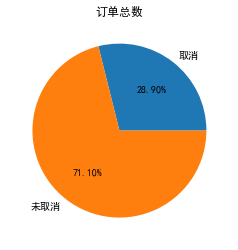

In [24]:
labels = ['取消','未取消']
X = [order_cancel, order_num-order_cancel]
fig = plt.figure()
plt.pie(X,labels=labels,autopct='%1.2f%%') # autopct :控制饼图内百分比设置, '%1.1f'指小数点前后位数(没有用空格补齐)；
plt.title("订单总数")

In [25]:
df2 = df.copy()
df2 = df2[(df2['sale_ord_valid_flag'] == 1)&(df2['cancel_flag'] == 0)&('before_prefr_unit_price' != 0)] # df2只包含有效订单

In [26]:
#有效订单数量
order_vaild = df2['sale_ord_id'].count()
order_vaild

33846

In [27]:
#支付订单数量
order_payed = df2['sale_ord_id'][df2['user_actual_pay_amount'] != 0].count()
order_payed

28769

In [28]:
#未支付订单数量
order_unpay = df2['sale_ord_id'][df2['user_actual_pay_amount'] == 0].count()
order_unpay

5077

Text(0.5, 1.0, '有效订单总数')

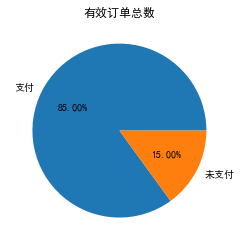

In [29]:
labels = ['支付','未支付']
Y = [order_payed, order_unpay]
fig = plt.figure()
plt.pie(Y,labels=labels,autopct='%1.2f%%')
plt.title("有效订单总数")

# 订单的价格分布

In [30]:
price_series = df2['after_prefr_unit_price']
price_series

0        1099.0
1        1099.0
2        1099.0
3        1099.0
4        1099.0
5        1099.0
6        1099.0
7        1099.0
8        1099.0
9        1099.0
10       1099.0
12       1099.0
16       1099.0
18       1099.0
19       1099.0
21       1099.0
23       1099.0
24       1099.0
25       1099.0
27       1099.0
28       1099.0
29       1099.0
30       1099.0
31       1099.0
33       1099.0
35       1099.0
39       1099.0
40       1099.0
42       1099.0
45       1099.0
          ...  
76580     769.0
76581     769.0
76582     769.0
76584     769.0
76586     769.0
76587     769.0
76590     769.0
76592     769.0
76593     690.0
76596     769.0
76597     769.0
76598     769.0
76599     769.0
76601     769.0
76602     769.0
76604     769.0
76605     769.0
76608     690.0
76609     769.0
76611     769.0
76612     690.0
76613     769.0
76614     690.0
76617     769.0
76618     769.0
76621     999.0
76624     769.0
76625     690.0
76626     769.0
76629     690.0
Name: after_prefr_unit_p

In [31]:
price_series_num = price_series.count()

hist, bin_edges = np.histogram(price_series, bins=80) #生成直方图函数
hist_sum = np.cumsum(hist)
hist_per = hist_sum / price_series_num

print('hist:{}'.format(hist))
print('*'*100)
print('bin_edges:{}'.format(bin_edges))
print('*'*100)
print('hist_sum:{}'.format(hist_sum))

hist:[   3 1526 4719  817 3544 2705 3392  979 2078  430 1201 1099  905 1295
  189  896  912  866  832  235  849 1340  359  207  136  223  258   52
   40  235  121    5  221  118  303   96   51   52    0  161    0   20
    1   52    1    0   21    6    0    0  137    0    1   58    0    0
    4    1    2    2    0    2    0    0    0   24   45    0    3    0
    1    1    0    1    0    0    1    0    0   12]
****************************************************************************************************
bin_edges:[1.0000000e+00 1.5947500e+02 3.1795000e+02 4.7642500e+02 6.3490000e+02
 7.9337500e+02 9.5185000e+02 1.1103250e+03 1.2688000e+03 1.4272750e+03
 1.5857500e+03 1.7442250e+03 1.9027000e+03 2.0611750e+03 2.2196500e+03
 2.3781250e+03 2.5366000e+03 2.6950750e+03 2.8535500e+03 3.0120250e+03
 3.1705000e+03 3.3289750e+03 3.4874500e+03 3.6459250e+03 3.8044000e+03
 3.9628750e+03 4.1213500e+03 4.2798250e+03 4.4383000e+03 4.5967750e+03
 4.7552500e+03 4.9137250e+03 5.0722000e+03 5.230675

In [32]:
hist_per

array([8.86367665e-05, 4.51752053e-02, 1.84600839e-01, 2.08739585e-01,
       3.13449152e-01, 3.93369970e-01, 4.93588607e-01, 5.22513739e-01,
       5.83909472e-01, 5.96614076e-01, 6.32098328e-01, 6.64568930e-01,
       6.91307688e-01, 7.29569225e-01, 7.35153342e-01, 7.61626189e-01,
       7.88571766e-01, 8.14158246e-01, 8.38740176e-01, 8.45683389e-01,
       8.70767594e-01, 9.10358683e-01, 9.20965550e-01, 9.27081487e-01,
       9.31099687e-01, 9.37688353e-01, 9.45311115e-01, 9.46847486e-01,
       9.48029309e-01, 9.54972523e-01, 9.58547539e-01, 9.58695267e-01,
       9.65224842e-01, 9.68711221e-01, 9.77663535e-01, 9.80499911e-01,
       9.82006736e-01, 9.83543107e-01, 9.83543107e-01, 9.88299947e-01,
       9.88299947e-01, 9.88890859e-01, 9.88920404e-01, 9.90456775e-01,
       9.90486320e-01, 9.90486320e-01, 9.91106778e-01, 9.91284051e-01,
       9.91284051e-01, 9.91284051e-01, 9.95331797e-01, 9.95331797e-01,
       9.95361343e-01, 9.97074987e-01, 9.97074987e-01, 9.97074987e-01,
      

In [33]:
bin_edges_plot = np.delete(bin_edges, 0)

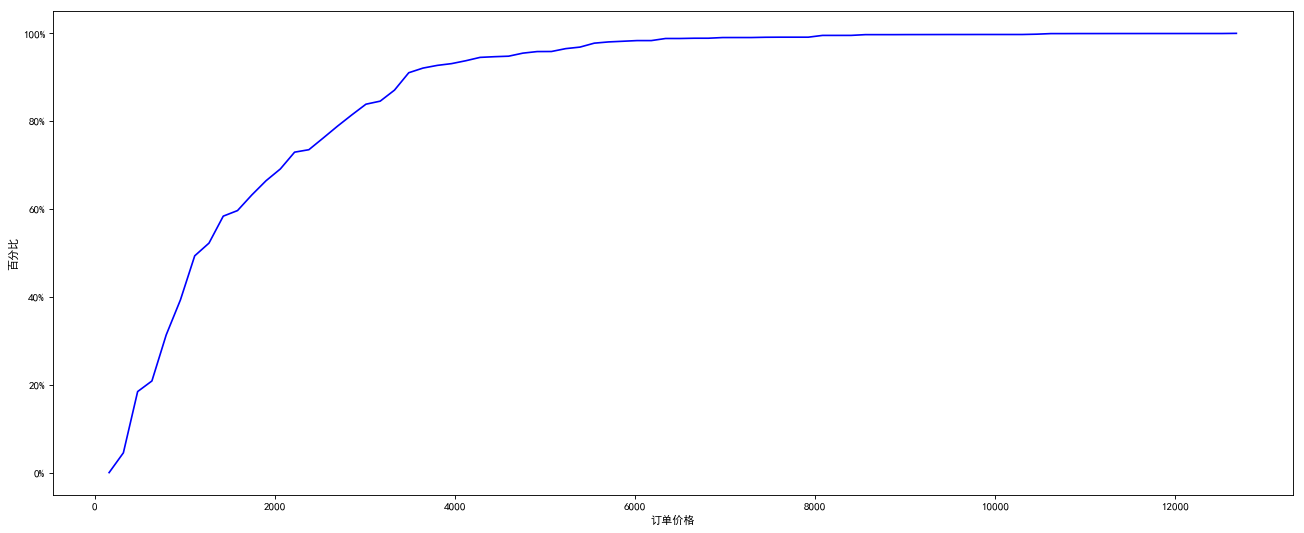

In [34]:
plt.figure(figsize=(20,8), dpi=80)
plt.xlabel('订单价格')
plt.ylabel('百分比')

plt.style.use('ggplot')

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.plot(bin_edges_plot, hist_per, color='blue')

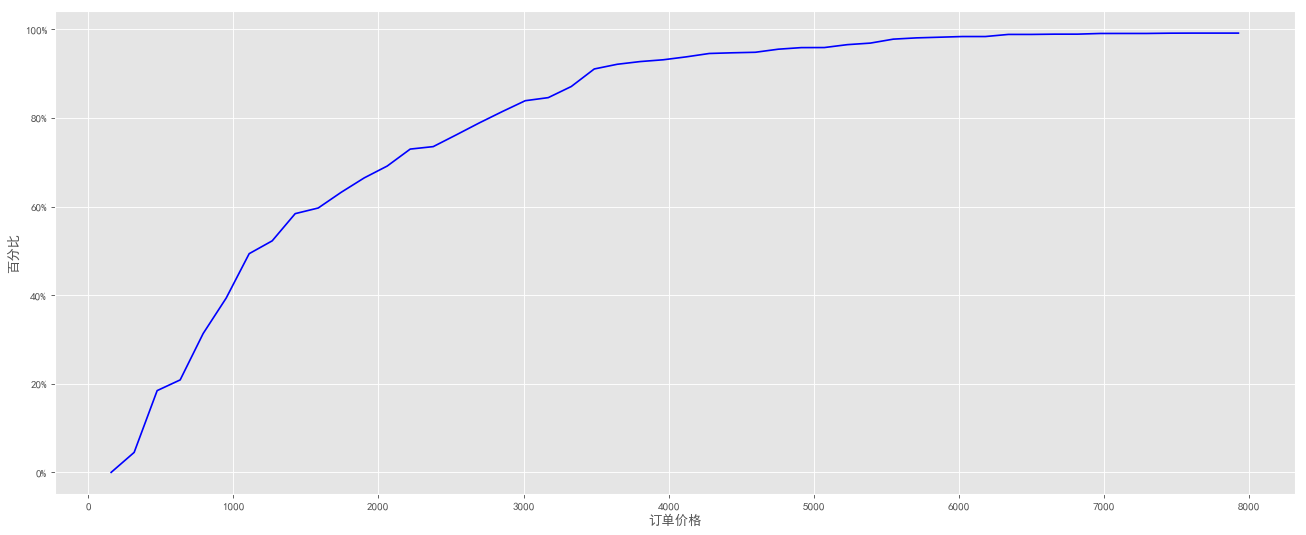

In [35]:
plt.figure(figsize=(20,8), dpi=80)
plt.xlabel('订单价格')
plt.ylabel('百分比')

plt.style.use('ggplot')

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.plot(bin_edges_plot[:50], hist_per[:50], color='blue')

# 微观分析

# 有效订单量

In [36]:
df3 = df2.copy()
df3['order_time_hms'] = df3['sale_ord_tm'].apply(lambda x: x.strftime('%H:00:00'))

In [37]:
df3

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,cancel_flag,check_account_tm,total_offer_amount,self_ord_flag,user_site_city_id,user_site_province_id,user_lv_cd,check_account_tm,total_actual_pay,order_time_hms
0,linfbi007,116828823929,116828823929,2020-05-25 18:09:39,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 18:10:23.0,400.0,1,757,10,61,2020-05-25 18:10:23,1099.0,18:00:00
1,13601089905_p,116769479986,121562216719,2020-05-25 00:04:15,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 00:05:59.0,400.0,1,0,0,62,2020-05-25 00:05:59,1099.0,00:00:00
2,jd_UbSjKwFGOfbv,116815391384,116809219025,2020-05-25 13:47:33,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 14:08:28.0,400.0,1,Not Given,Not Given,50,2020-05-25 14:08:28,1099.0,13:00:00
3,yangwangjun1300,116814673181,116814673181,2020-05-25 14:34:25,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 14:34:47.0,400.0,1,1655,19,61,2020-05-25 14:34:47,1099.0,14:00:00
4,jd_77dbadc203044,116811074034,116811074034,2020-05-25 14:47:42,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,NaN,400.0,1,Not Given,Not Given,56,NaT,1099.0,14:00:00
5,葑存记忆,121591740399,121591740399,2020-05-25 11:38:12,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 11:38:40.0,400.0,1,350,6,105,2020-05-25 11:38:40,1099.0,11:00:00
6,jd_uuwhuTZixluQ,116825666739,116825666739,2020-05-25 17:09:30,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 17:10:54.0,400.0,1,Not Given,Not Given,50,2020-05-25 17:10:54,1099.0,17:00:00
7,haiqiang0307,116881662586,116881662586,2020-05-25 23:24:22,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 23:24:35.0,400.0,1,2837,2,62,2020-05-25 23:24:35,1099.0,23:00:00
8,shangchunping0216,116847011379,116847011379,2020-05-25 20:12:12,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 20:12:24.0,400.0,1,1081,13,56,2020-05-25 20:12:24,1099.0,20:00:00
9,jd_5d3fef6659091,116835354680,116835354680,2020-05-25 17:20:53,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 17:24:42.0,400.0,1,0,0,56,2020-05-25 17:24:42,1099.0,17:00:00


In [38]:
pay_time_df = df3.groupby('order_time_hms')['sale_ord_id'].count()
pay_time_df

order_time_hms
00:00:00    4032
01:00:00     406
02:00:00     146
03:00:00     101
04:00:00      93
05:00:00     216
06:00:00     461
07:00:00     692
08:00:00    1091
09:00:00    1602
10:00:00    2043
11:00:00    1850
12:00:00    1893
13:00:00    1696
14:00:00    1697
15:00:00    1620
16:00:00    1607
17:00:00    1774
18:00:00    1620
19:00:00    1953
20:00:00    2445
21:00:00    1957
22:00:00    1753
23:00:00    1098
Name: sale_ord_id, dtype: int64

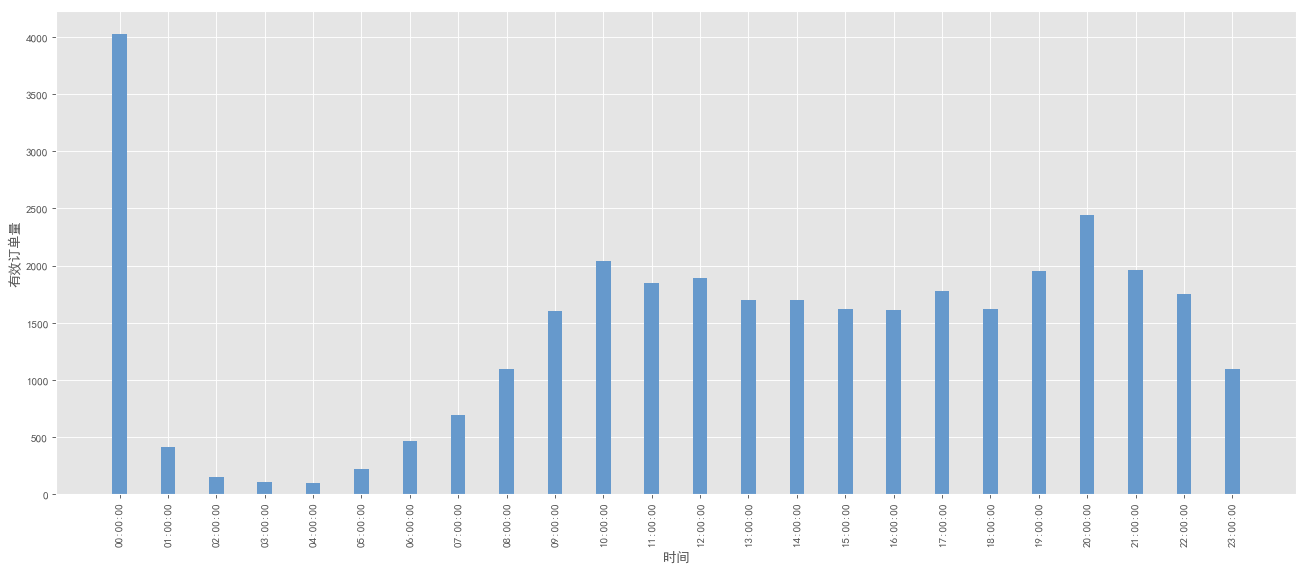

In [39]:
x = pay_time_df.index
y = pay_time_df.values

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('时间')
plt.ylabel("有效订单量")
plt.xticks(range(len(x)), x, rotation=90)
rect = plt.bar(x, y, width=0.3, color=['#6699CC'])

# 时间维度来对订单数据进行拆分-人均有效订单量

In [40]:
order_time_df = df3.groupby('order_time_hms')['sale_ord_id'].agg({'order_num':'count'})
order_time_df

,order_num
order_time_hms,
00:00:00,4032
01:00:00,406
02:00:00,146
03:00:00,101
04:00:00,93
05:00:00,216
06:00:00,461
07:00:00,692
08:00:00,1091


In [41]:
user_time_df = df3.groupby('order_time_hms')['user_log_acct'].agg({'user_num':'nunique'})
user_time_df

,user_num
order_time_hms,
00:00:00,3799
01:00:00,377
02:00:00,143
03:00:00,101
04:00:00,93
05:00:00,207
06:00:00,450
07:00:00,661
08:00:00,1062


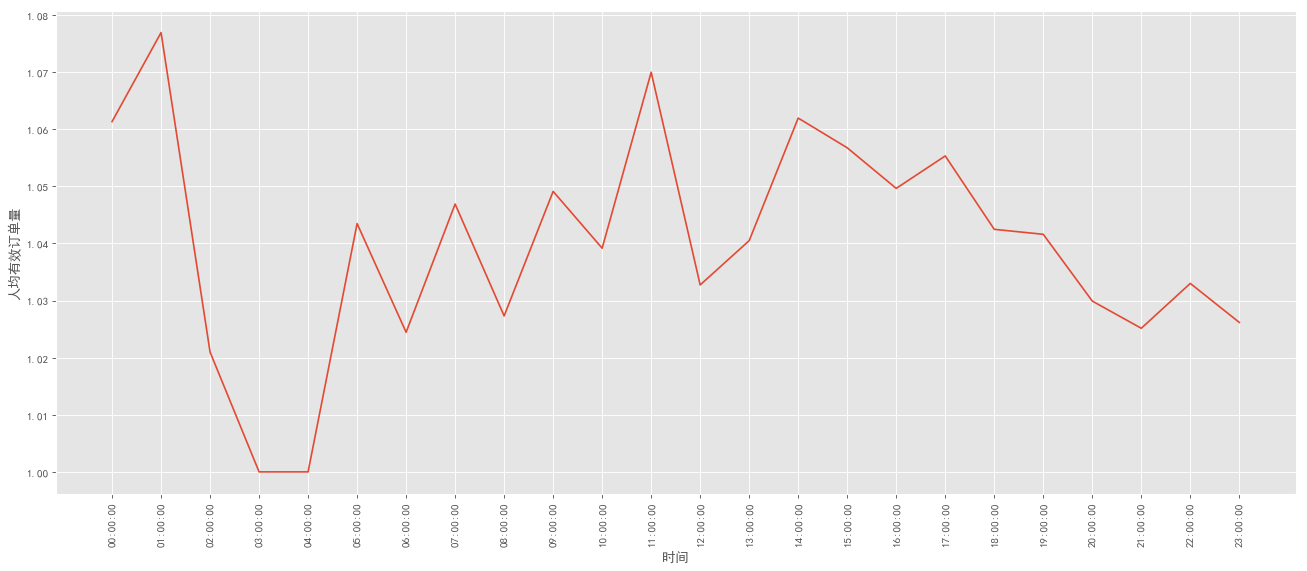

In [42]:
order_num_per_user = order_time_df['order_num'] / user_time_df['user_num']

x = order_num_per_user.index
y = order_num_per_user.values

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('时间')
plt.ylabel("人均有效订单量")
plt.xticks(range(len(x)),x,rotation=90)
plt.plot(x, y)

# 客单价和平均订单价格

In [43]:
total_pay_time_df = df3.groupby('order_time_hms')['total_actual_pay'].agg({'total_pay':'sum'})
total_pay_time_df

,total_pay
order_time_hms,
00:00:00,11909925.00
01:00:00,885705.70
02:00:00,297508.92
03:00:00,242141.00
04:00:00,206095.00
05:00:00,517820.23
06:00:00,1014900.00
07:00:00,1502330.99
08:00:00,2034257.26


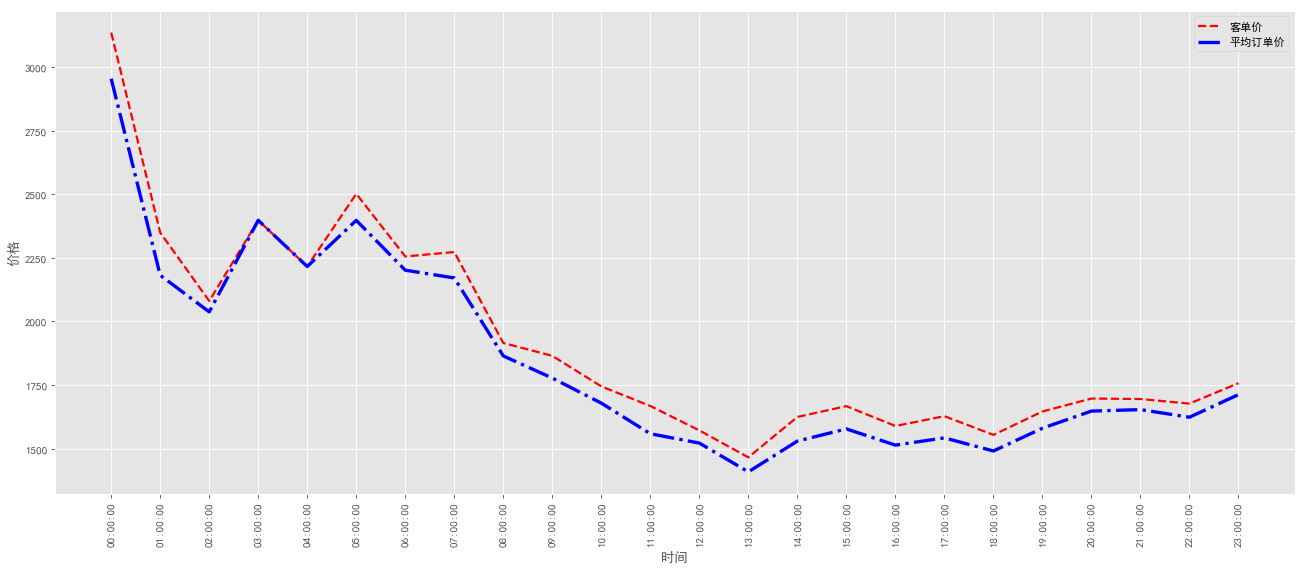

In [44]:
pay_per_user = total_pay_time_df['total_pay'] / user_time_df['user_num'] # 客单价：销售额 / 顾客数
pay_per_order = total_pay_time_df['total_pay'] / order_time_df['order_num'] # 平均订单价：销售额 / 订单数

x = pay_per_user.index
y = pay_per_user.values
y2 = pay_per_order.values

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('时间')
plt.ylabel("价格")
plt.xticks(range(len(x)),x,rotation=90)

plt.plot(x, y, color='red',linewidth=2.0,linestyle='--')
plt.plot(x, y2, color='blue',linewidth=3.0,linestyle='-.')
plt.legend(['客单价','平均订单价'])

# 价格累积分布图

In [45]:
df4 = df3.copy()
df5 = df3.copy()

df4 = df4[df4['order_time_hms'] == '00:00:00']
df5 = df5[df5['order_time_hms'] == '20:00:00']

In [46]:
def plot_acc_line(price_series, bin_num):
    len = price_series.count()
    hist, bin_edges = np.histogram(price_series, bins=bin_num) #生成直方图函数
    hist_sum = np.cumsum(hist)
    hist_per = hist_sum / len * 100
    hist_per_plot = np.insert(hist_per, 0, 0)

    plt.figure(figsize=(20,8), dpi=80)
    plt.xlabel('订单价格')
    plt.ylabel('百分比')

    plt.plot(bin_edges, hist_per_plot, color='blue')

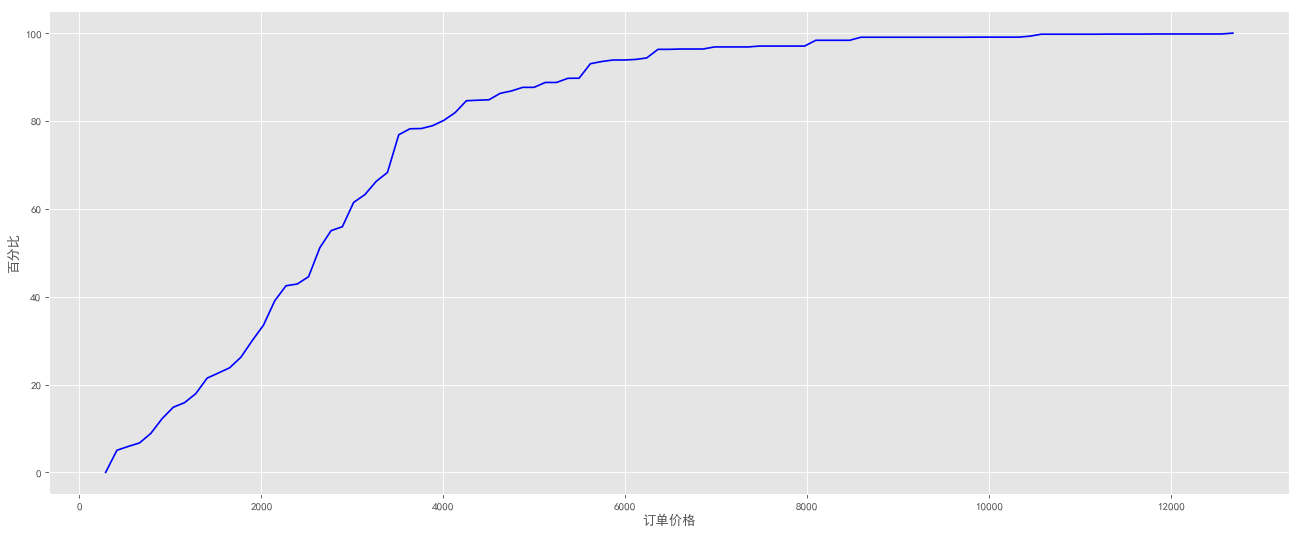

In [47]:
# 0时价格累积分布折线图

price_series_0 = df4['after_prefr_unit_price']
plot_acc_line(price_series_0, 100)

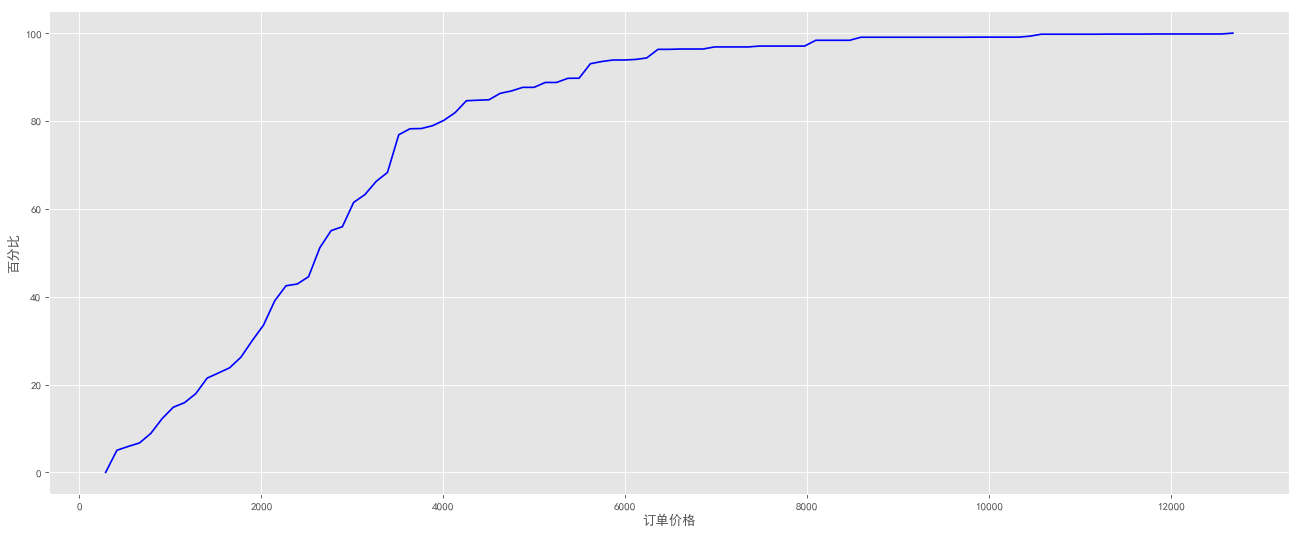

In [48]:
# 20时价格累积分布折线图

price_series_20 = df5['after_prefr_unit_price']
plot_acc_line(price_series_0, 100)

# 从时间维度对订单进行拆分

In [49]:
#0时的优惠订单数
offer_order_0 = df4['sale_ord_id'][df4['total_offer_amount'] > 0].count()

#0时订单数
order_num_0 = df4['sale_ord_id'].count()

#0时优惠订单比
offer_order_per_0 = offer_order_0 / order_num_0

print('0时的优惠订单数:{}, 0时的订单数:{}, 优惠订单比例：{}'.format(offer_order_0, order_num_0, offer_order_per_0))

0时的优惠订单数:3788, 0时的订单数:4032, 优惠订单比例：0.939484126984127


In [50]:
#全部优惠订单数
offer_order_all = df3['sale_ord_id'][df3['total_offer_amount'] > 0].count()

#全部订单数
order_all = df3['sale_ord_id'].count()

#其他时间优惠订单数
offer_order_other = offer_order_all - offer_order_0

#其他时间订单数
order_num_other = order_all - order_num_0

offer_order_per_other = offer_order_other / order_num_other

print('其他时间的优惠订单数:{}, 其他时间的订单数:{}, 其他时间优惠订单比例：{}'.format(offer_order_other, order_num_other, offer_order_per_other))

其他时间的优惠订单数:25983, 其他时间的订单数:29814, 其他时间优惠订单比例：0.8715033205876433


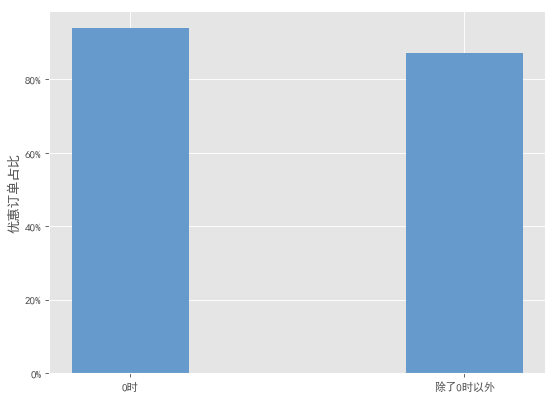

In [51]:
#0时和其他时间的优惠订单的占比对比:可视化

plt.figure(figsize=(8, 6), dpi=80)
N = 2
index = ('0时', '除了0时以外')
data = (offer_order_per_0, offer_order_per_other)
width = 0.35
plt.ylabel("优惠订单占比")

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

p2 = plt.bar(index, data, width, color='#6699CC')

In [52]:
total_pay_time_df = df3.groupby('order_time_hms')['total_offer_amount'].agg({'total_offer_amount':'sum'})
total_pay_time_df

,total_offer_amount
order_time_hms,
00:00:00,2773061.00
01:00:00,245842.00
02:00:00,64832.00
03:00:00,49619.00
04:00:00,42450.00
05:00:00,109581.00
06:00:00,215421.00
07:00:00,347409.00
08:00:00,555511.00


In [53]:
offer_amount_0 = total_pay_time_df['total_offer_amount'][0]

offer_amount_other = total_pay_time_df[1:].apply(lambda x: x.sum())['total_offer_amount'] #按行求和

offer_amount_0_avg = offer_amount_0 / offer_order_0
offer_amount_other_avg = offer_amount_other / offer_order_other

print('0时平均优惠价格:{}, 其他时间平均优惠价格:{}'.format(offer_amount_0_avg, offer_amount_other_avg))

0时平均优惠价格:732.0646779303062, 其他时间平均优惠价格:456.9508043720895


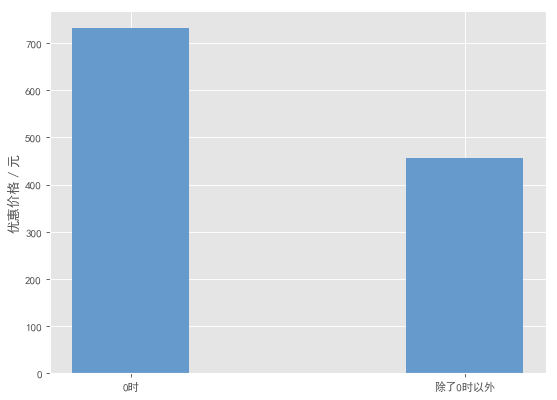

In [54]:
#0时和其他时间的平均优惠价格对比：可视化
plt.figure(figsize=(8, 6), dpi=80)
N = 2
index = ('0时', '除了0时以外')

values = (offer_amount_0_avg, offer_amount_other_avg)
width = 0.35

plt.ylabel("优惠价格／元")

p2 = plt.bar(index, values, width, color='#6699CC')

# 从地区维度对订单进行拆分

In [55]:
df6 = df2.copy()

order_area_df = df6.groupby('user_site_province_id', as_index=False)['sale_ord_id'].agg({'order_num':'count'})
order_area_df.columns = ['province_id','order_num']
order_area_df

,province_id,order_num
0,0,9883
1,1,1180
2,10,88
3,11,40
4,12,714
5,13,394
6,14,194
7,15,444
8,16,254
9,17,331


In [56]:
order_area_df.drop([34], inplace=True)
order_area_df['province_id']=order_area_df['province_id'].astype('int')
order_area_df

,province_id,order_num
0,0,9883
1,1,1180
2,10,88
3,11,40
4,12,714
5,13,394
6,14,194
7,15,444
8,16,254
9,17,331


In [57]:
city = 'city_level.csv'
df_city = pd.read_csv(city,sep = ',', encoding="gbk", dtype=str)
df_city['province_id'] = df_city['province_id'].astype('int')
df_city

,dim_city_id,dim_city_name,city_id,dim_province_id,dim_province_name,province_id,city_level
0,1000,济南市,1000,13,山东,13,二线
1,1007,青岛市,1007,13,山东,13,二线
2,1016,淄博市,1016,13,山东,13,三线
3,1022,枣庄市,1022,13,山东,13,四线
4,1025,东营市,1025,13,山东,13,三线
5,1032,潍坊市,1032,13,山东,13,三线
6,1042,烟台市,1042,13,山东,13,三线
7,1053,威海市,1053,13,山东,13,三线
8,1058,莱芜市,1058,13,山东,13,四线
9,1060,德州市,1060,13,山东,13,四线


In [58]:
df_city = df_city.drop_duplicates(subset=['province_id'], keep='first') # 保留重复数据的第一个，也就是只保留省份数据
df_city

,dim_city_id,dim_city_name,city_id,dim_province_id,dim_province_name,province_id,city_level
0,1000,济南市,1000,13,山东,13,二线
16,1114,铜陵市,1114,14,安徽,14,四线
21,113,万州区,113,4,重庆,4,二线
28,1158,宁波市,1158,15,浙江,15,二线
51,1303,福州市,1303,16,福建,16,二线
53,1310,钓鱼岛,1310,84,钓鱼岛,84,NaN
69,1381,武汉市,1381,17,湖北,17,二线
77,142,石家庄市,142,5,河北,5,三线
87,1482,长沙市,1482,18,湖南,18,二线
101,15945,阿拉尔市,15945,31,新疆,31,五线


In [59]:
df_city = df_city[['province_id','dim_province_name']].sort_values(by='province_id',ascending=True).reset_index()
df_city.drop(['index'], axis=1, inplace=True)
df_city

,province_id,dim_province_name
0,1,北京
1,2,上海
2,3,天津
3,4,重庆
4,5,河北
5,6,山西
6,7,河南
7,8,辽宁
8,9,吉林
9,10,黑龙江


In [60]:
order_province_df = pd.merge(order_area_df, df_city, on='province_id').sort_values(by='order_num', ascending=False)
order_province_df

,province_id,order_num,dim_province_name
10,19,1831,广东
0,1,1180,北京
3,12,714,江苏
11,2,592,上海
14,22,557,四川
6,15,444,浙江
4,13,394,山东
8,17,331,湖北
29,7,294,河南
19,27,289,陕西


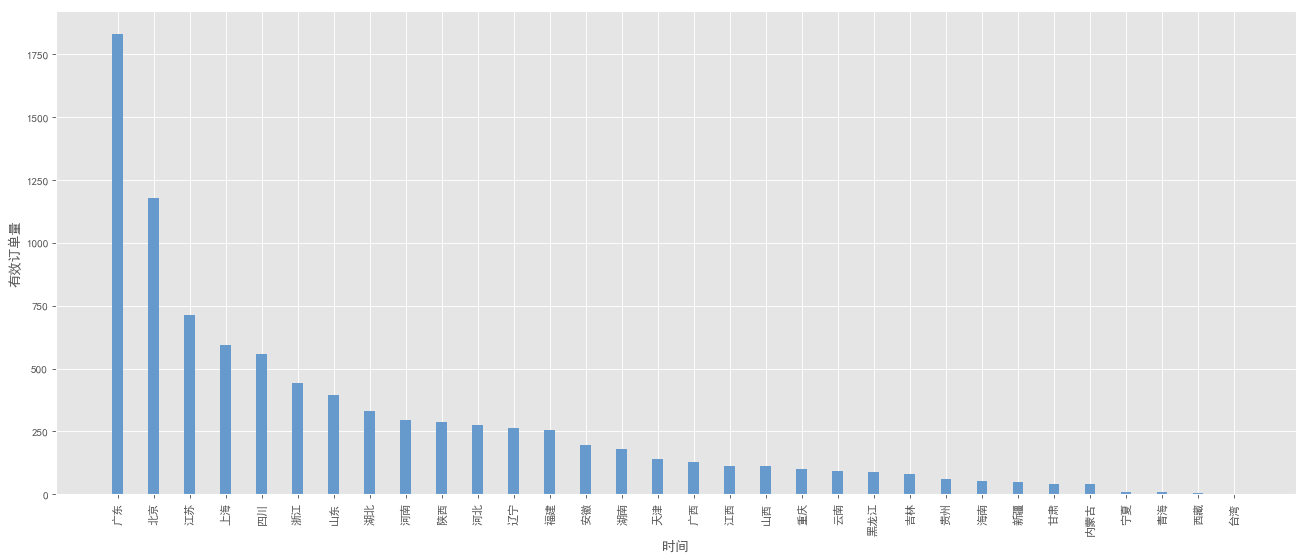

In [61]:
#有效订单量
plt.style.use('ggplot')

x = order_province_df['dim_province_name']
y = order_province_df['order_num']

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('时间')
plt.ylabel("有效订单量")
plt.xticks(range(len(x)), x, rotation=90)
rect = plt.bar(x, y, width=0.3, color=['#6699CC'])

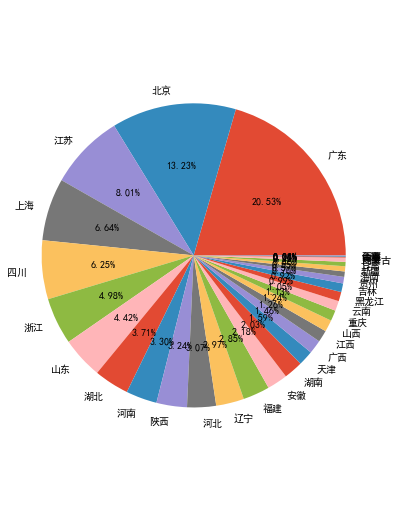

In [62]:
#有效订单量-饼图
plt.figure(figsize=(6,9)) 
labels = order_province_df['dim_province_name']

plt.pie(order_province_df['order_num'], labels=labels,autopct='%1.2f%%') # autopct :控制饼图内百分比设置, '%1.1f'指小数点前后位数(没有用空格补齐)；

plt.axis('equal')
plt.show()

In [63]:
#各省份客单价对比

cust_price_df = df6.groupby('user_site_province_id', as_index=False)['total_actual_pay'].agg({'total_pay':'sum'})
cust_price_df.columns = ['province_id','total_pay']
cust_price_df.drop([34], inplace=True)
cust_price_df['province_id'] = cust_price_df['province_id'].astype('int')
cust_price_df = pd.merge(cust_price_df, df_city, on='province_id').sort_values(by='total_pay', ascending=False)
cust_price_df['order_num'] = order_province_df['order_num']

cust_df = df6.groupby('user_site_province_id', as_index=False)['user_log_acct'].agg({'user_num':'nunique'})
cust_df.columns = ['province_id','user_num']
cust_df.drop([34], inplace=True)
cust_df['province_id'] = cust_df['province_id'].astype('int')

cust_price_df = pd.merge(cust_price_df, cust_df, on='province_id')
cust_price_df['cust_price'] = cust_price_df['total_pay'] / cust_price_df['user_num'] #计算客单价
cust_price_df = cust_price_df.sort_values(by='order_num', ascending=False)
cust_price_df = cust_price_df[:10]
cust_price_df = cust_price_df.sort_values(by='cust_price', ascending=False)

cust_price_df

,province_id,total_pay,dim_province_name,order_num,user_num,cust_price
3,2,1425442.00,上海,592,538,2649.520446
5,13,938661.01,山东,394,383,2450.812037
2,12,1603704.00,江苏,714,704,2277.988636
1,1,2548956.74,北京,1180,1135,2245.776863
6,15,937725.00,浙江,444,422,2222.097156
7,17,712541.00,湖北,331,327,2179.024465
4,22,1104843.00,四川,557,548,2016.136861
9,27,564524.00,陕西,289,287,1966.982578
0,19,3547611.01,广东,1831,1813,1956.762830
11,7,499252.64,河南,294,285,1751.763649


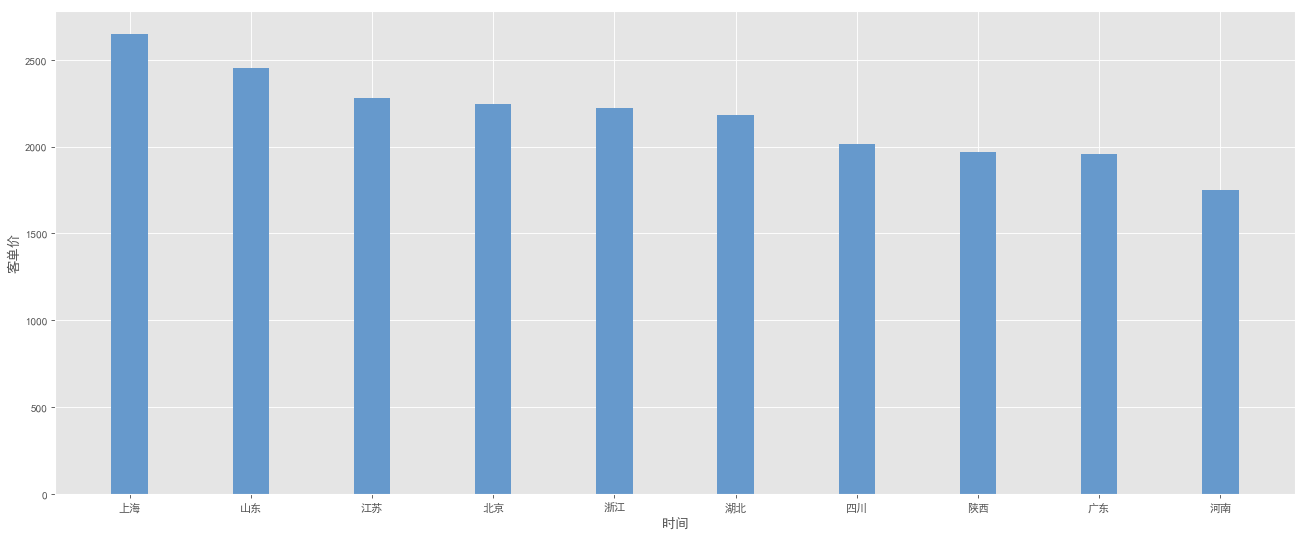

In [64]:
plt.style.use('ggplot')

x = cust_price_df['dim_province_name']
y = cust_price_df['cust_price']

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('时间')
plt.ylabel("客单价")
rect = plt.bar(x, y, width=0.3, color=['#6699CC'])

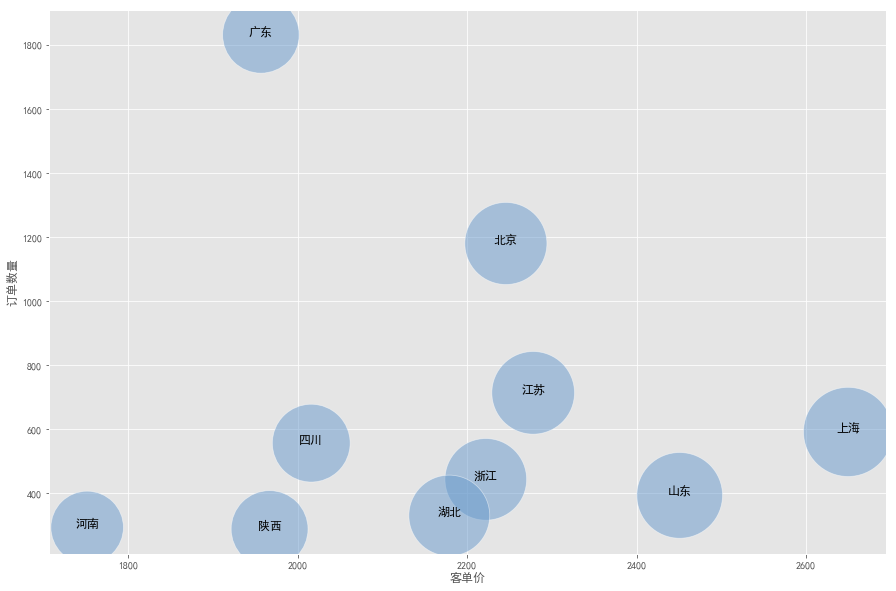

In [65]:
plt.figure(figsize = (15,10))

x = cust_price_df['cust_price']
y = cust_price_df['order_num']

ax = sns.scatterplot(x, y, alpha=0.5, s=x*3, c=['#6699CC']) # 绘制气泡图. alpha是不透明度
ax.set_xlabel("客单价",fontsize=12)
ax.set_ylabel("订单数量",fontsize=12)

province_list = [3,5,2,1,6,7,4,9,0,11]
# 在气泡上加文字
for line in province_list:
    ax.text(x[line], y[line], cust_price_df['dim_province_name'][line], horizontalalignment='center', size='large', color='black', weight='semibold')

# 头部省份的四个品牌的渗透率

In [66]:
#不同品牌的产品单价
df7 = df2.copy()

brand_sale_df = df7.groupby('brandname', as_index=False).agg({'total_actual_pay':'sum', 'sale_qtty':'sum'}).sort_values(by='total_actual_pay', ascending=False)
brand_sale_df

,brandname,total_actual_pay,sale_qtty
30,海尔（Haier）,16634130.64,7540
13,容声（Ronshen）,11813300.63,5989
37,西门子（SIEMENS）,6738061.09,1260
35,美的（Midea）,4473746.14,2709
29,海信（Hisense）,2663095.57,1720
17,康佳（KONKA）,2276290.54,2584
25,松下（Panasonic）,2146912.00,453
36,美菱（MeiLing）,1787125.73,890
0,TCL,1578416.85,1419
27,格力（GREE）,1426076.00,726


In [67]:
df8 = df7.copy()

df8 = df8[df8['user_site_province_id'] == '1'] # 省份取北京，数字是省份id

brand_sale_df_bj = df8.groupby('brandname', as_index=False).agg({'total_actual_pay':'sum', 'sale_qtty':'sum'}).sort_values(by='total_actual_pay', ascending=False)
brand_sale_df_bj = brand_sale_df_bj[(brand_sale_df_bj['brandname'] == '海尔（Haier）')|(brand_sale_df_bj['brandname'] == '容声（Ronshen）')|(brand_sale_df_bj['brandname'] == '西门子（SIEMENS）')|(brand_sale_df_bj['brandname'] == '美的（Midea）')]
brand_sale_df_bj

,brandname,total_actual_pay,sale_qtty
26,海尔（Haier）,820296.00,325
33,西门子（SIEMENS）,413613.00,79
12,容声（Ronshen）,276533.00,122
31,美的（Midea）,100864.14,63


In [68]:
df8 = df7.copy()

df8 = df8[df8['brandname'] == '海尔（Haier）']

brand_sale_df_haier = df8.groupby('user_site_province_id', as_index=False).agg({'total_actual_pay':'sum', 'sale_qtty':'sum'}).sort_values(by='total_actual_pay', ascending=False)
brand_sale_df_haier = brand_sale_df_haier[(brand_sale_df_haier['user_site_province_id'] == '1')|(brand_sale_df_haier['user_site_province_id'] == '2')|(brand_sale_df_haier['user_site_province_id'] == '12')|(brand_sale_df_haier['user_site_province_id'] == '22')|(brand_sale_df_haier['user_site_province_id'] == '19')]
brand_sale_df_haier['user_site_province_id'] = brand_sale_df_haier['user_site_province_id'].astype('int')
brand_sale_df_haier.columns = ['province_id','total_actual_pay', 'sale_qtty']
brand_sale_df_haier.sort_values(by='province_id')

,province_id,total_actual_pay,sale_qtty
1,1,820296.00,325
12,2,316005.00,139
4,12,422743.00,164
11,19,826869.01,366
15,22,291425.00,124


In [69]:
cust_price_df

,province_id,total_pay,dim_province_name,order_num,user_num,cust_price
3,2,1425442.00,上海,592,538,2649.520446
5,13,938661.01,山东,394,383,2450.812037
2,12,1603704.00,江苏,714,704,2277.988636
1,1,2548956.74,北京,1180,1135,2245.776863
6,15,937725.00,浙江,444,422,2222.097156
7,17,712541.00,湖北,331,327,2179.024465
4,22,1104843.00,四川,557,548,2016.136861
9,27,564524.00,陕西,289,287,1966.982578
0,19,3547611.01,广东,1831,1813,1956.762830
11,7,499252.64,河南,294,285,1751.763649


In [70]:
order_num_df = cust_price_df[['province_id', 'order_num']][(cust_price_df['province_id'] == 1)|(cust_price_df['province_id'] == 12)|(cust_price_df['province_id'] == 19)|(cust_price_df['province_id'] == 2)|(cust_price_df['province_id'] == 22)]
order_num_df = order_num_df.sort_values(by='province_id')
order_num_df

,province_id,order_num
1,1,1180
3,2,592
2,12,714
0,19,1831
4,22,557


In [71]:
brand_sale_df_haier = pd.merge(brand_sale_df_haier, order_num_df, on='province_id')
brand_sale_df_haier['渗透率'] = brand_sale_df_haier['sale_qtty'] / brand_sale_df_haier['order_num']
brand_sale_df_haier

,province_id,total_actual_pay,sale_qtty,order_num,渗透率
0,19,826869.01,366,1831,0.199891
1,1,820296.00,325,1180,0.275424
2,12,422743.00,164,714,0.229692
3,2,316005.00,139,592,0.234797
4,22,291425.00,124,557,0.222621


In [72]:
def province_shentou(df, brandname, cust_price_df):
    df = df[df['brandname'] == brandname]

    brand_sale_df = df.groupby('user_site_province_id', as_index=False).agg({'total_actual_pay':'sum', 'sale_qtty':'sum'}).sort_values(by='total_actual_pay', ascending=False)
    brand_sale_df = brand_sale_df[(brand_sale_df['user_site_province_id'] == '1')|(brand_sale_df['user_site_province_id'] == '2')|(brand_sale_df['user_site_province_id'] == '12')|(brand_sale_df['user_site_province_id'] == '22')|(brand_sale_df['user_site_province_id'] == '19')]
    brand_sale_df['user_site_province_id'] = brand_sale_df['user_site_province_id'].astype('int')
    brand_sale_df.columns = ['province_id','total_actual_pay', 'sale_qtty']
    brand_sale_df.sort_values(by='province_id')
    
    order_num = cust_price_df[['province_id', 'order_num']][(cust_price_df['province_id'] == 1)|(cust_price_df['province_id'] == 12)|(cust_price_df['province_id'] == 19)|(cust_price_df['province_id'] == 2)|(cust_price_df['province_id'] == 22)]
    order_num = order_num.sort_values(by='province_id')
    
    brand_sale_df = pd.merge(brand_sale_df, order_num_df, on='province_id')
    brand_sale_df['渗透率'] = brand_sale_df['sale_qtty'] / brand_sale_df['order_num']
    brand_sale_df = brand_sale_df.sort_values(by='province_id')
    
    return brand_sale_df

In [73]:
df9 = df7.copy()

brand_sale_df_rs = province_shentou(df9, '容声（Ronshen）', cust_price_df)
brand_sale_df_siem = province_shentou(df9, '西门子（SIEMENS）', cust_price_df)
brand_sale_df_mi = province_shentou(df9, '美的（Midea）', cust_price_df)

brand_sale_df_siem

,province_id,total_actual_pay,sale_qtty,order_num,渗透率
1,1,413613.0,79,1180,0.066949
2,2,411564.0,78,592,0.131757
3,12,379749.0,73,714,0.102241
0,19,493163.0,91,1831,0.049700
4,22,159770.0,28,557,0.050269


([<matplotlib.axis.XTick at 0x203bfcce0b8>,
 <a list of 5 Text xticklabel objects>)

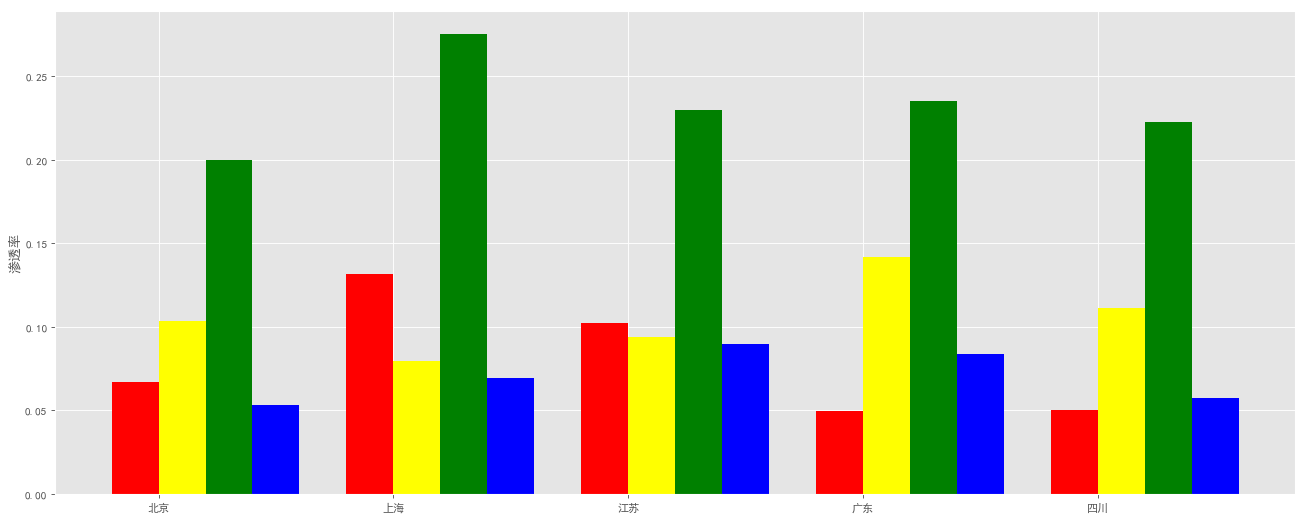

In [74]:
plt.style.use('ggplot')

x = np.arange(5)

y1 = brand_sale_df_siem['渗透率']
y2 = brand_sale_df_rs['渗透率']
y3 = brand_sale_df_haier['渗透率']
y4 = brand_sale_df_mi['渗透率']

tick_label=['北京', '上海', '江苏', '广东', '四川']

total_width, n = 0.8, 4
width = total_width / n
x = x - (total_width - width) / 2

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.ylabel("渗透率")

bar_width = 0.2
plt.bar(x, y1, width=bar_width, color=['red'])
plt.bar(x+width, y2, width=bar_width, color=['yellow'])
plt.bar(x+2*width, y3, width=bar_width, color=['green'])
plt.bar(x+3*width, y4, width=bar_width, color=['blue'])

plt.xticks(x+bar_width/2, tick_label) # 显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置

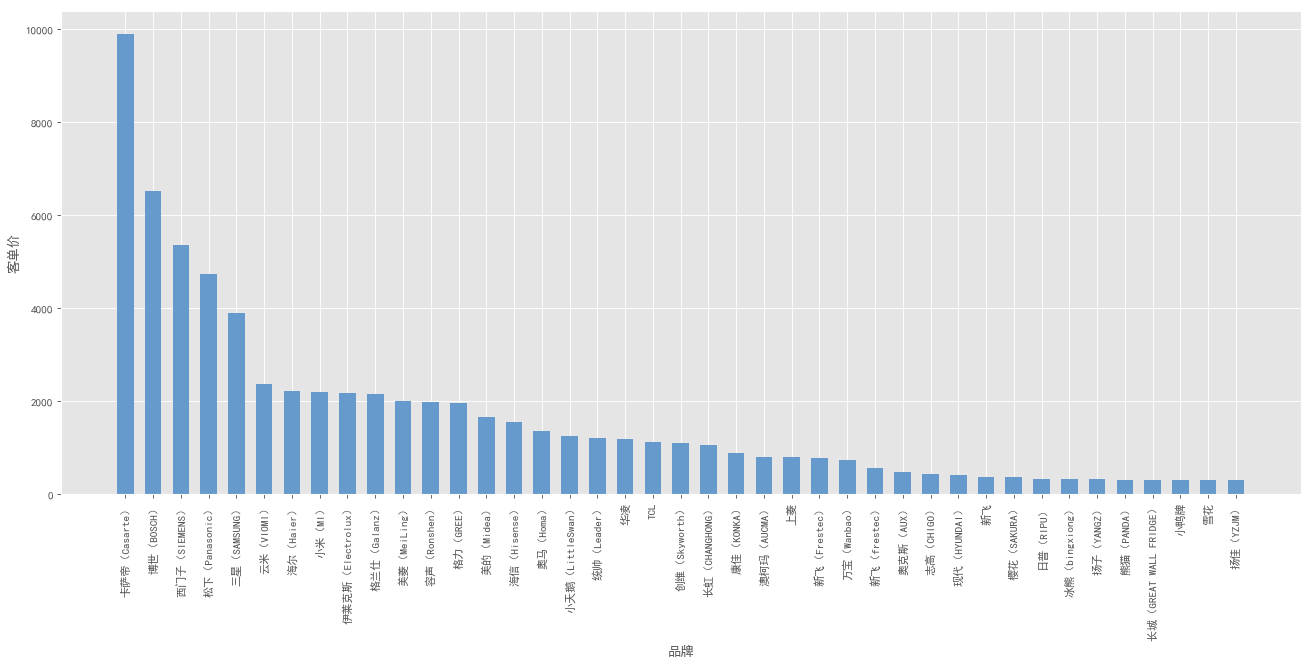

In [75]:
plt.style.use('ggplot')

brand_sale_df['单价'] = brand_sale_df['total_actual_pay'] / brand_sale_df['sale_qtty']
brand_sale_df = brand_sale_df.sort_values(by='单价', ascending=False)

x = brand_sale_df['brandname']
y = brand_sale_df['单价']

plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('品牌')
plt.ylabel("客单价")

plt.xticks(range(len(x)), x, rotation=90)
rect = plt.bar(x, y, width=0.6, color=['#6699CC'])

plt.show()